In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplot
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Getting all the libraries loaded in

In [ ]:
file_path = '/content/drive/My Drive/Intro-to-ML/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
x1 = sample.values[:,0]
x2 = sample.values[:,1]
x3 = sample.values[:,2]
Y = sample.values[:,3]
m = len(x1)
n = len(Y)
x0 = np.ones((m,1))

Load in all your inputs and grand truths

In [ ]:
x_1 = x1.reshape(m,1)
x_2 = x2.reshape(m,1)
x_3 = x3.reshape(m,1)
X_1 = np.hstack((x0, x_1))
X_2 = np.hstack((x0, x_2))
X_3 = np.hstack((x0, x_3))
X_all = np.hstack((x0, x_1, x_2, x_3))
X_all[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

Cost Compute function, using formula derived in class

In [ ]:
def compute_cost(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  L = 1 / (2*m) * np.sum(sqrErrors)
  return L

Calculate function for calculating dL/dw (and dL/db), using formula derived in class

In [ ]:
def gradient_descent(X, Y, theta, alpha, iterations):
  m = len(Y)
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (1 / m) * X.transpose().dot(errors)
    theta -= alpha * sum_delta
    cost_history[i] = compute_cost(X, Y, theta)

  return theta, cost_history

Function for plotting Loss because we are going to be doing it a lot and its easier to not copy and paste a thousand times

In [ ]:
def plot_loss(iterations, cost_history):
  mplot.plot(range(1, iterations + 1), cost_history, color='blue')
  mplot.rcParams["figure.figsize"] = (10, 6)
  mplot.grid(True)

  mplot.xlabel('Number of iterations')
  mplot.ylabel('Cost (J)')
  mplot.title('Convergence of gradient descent')

# Show the plot
  mplot.show()

Run the data with only the x1 values as the explanatory variables

Final Value of theta =  [ 5.92043383 -2.03541173]


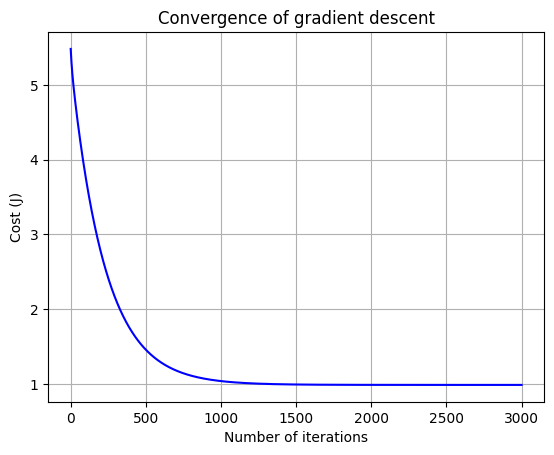

In [ ]:
X = X_1                                                               # Set data equal to x1 values
theta = np.zeros(X.shape[1])                                          # Set theta equal to zero
iterations = 3000                                                     # Probably too many iterations
alpha = .01                                                           # Small alpha
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final Value of theta = ', theta)
theta_x1 = theta                                                      # Save theta values
plot_loss(iterations, cost_history)                                   # Plot loss function

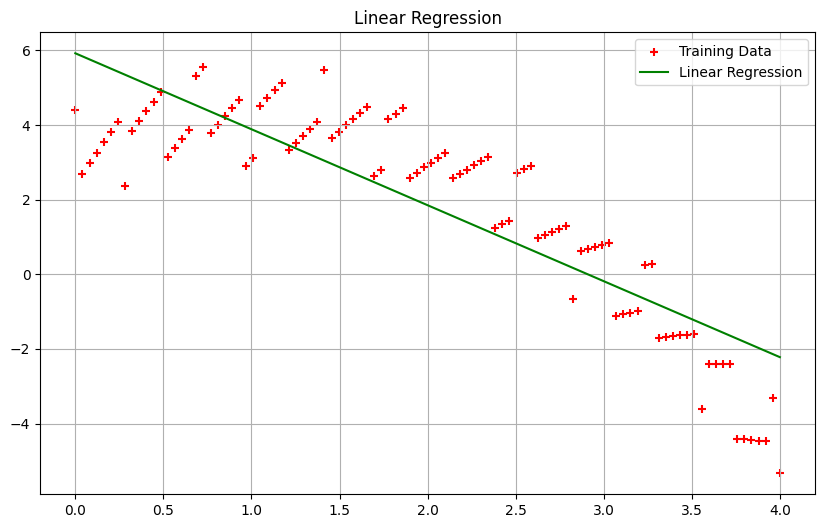

In [ ]:
mplot.scatter(X[:, 1], Y, color='red', marker='+', label='Training Data')
mplot.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')
mplot.grid(True)
mplot.title('Linear Regression')
mplot.legend()
mplot.show()

Calculate and plot with only the x2 values as the explanatory variable

Final Value of theta =  [0.73547995 0.55783354]


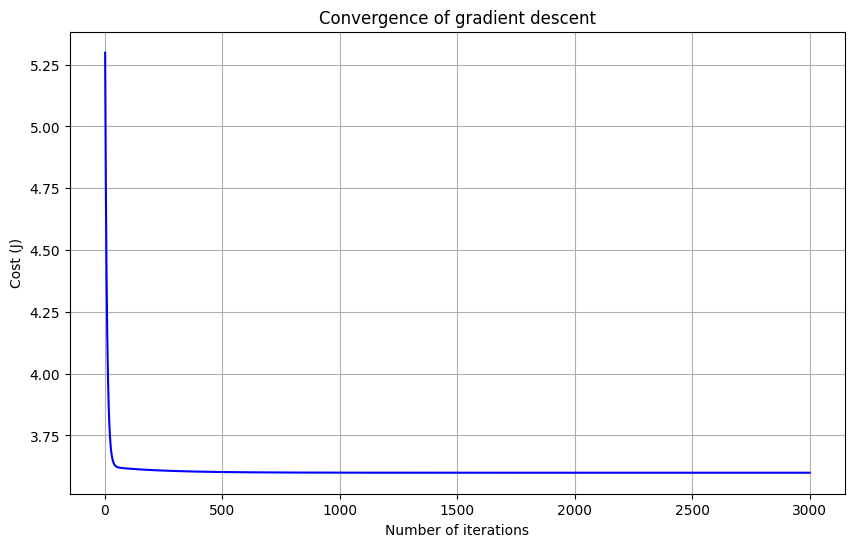

In [ ]:
X = X_2                                                                 # Set data to only x2 variable
theta = np.zeros(X.shape[1])                                            # Zero out theta
iterations = 3000                                                       # Probably too many iterations
alpha = .01                                                             # Set alpha
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)  # Go ML model go!
print('Final Value of theta = ', theta)                                 # print theta value
theta_x2 = theta                                                        # Save x2s theta
plot_loss(iterations, cost_history)                                     # Plot Loss function

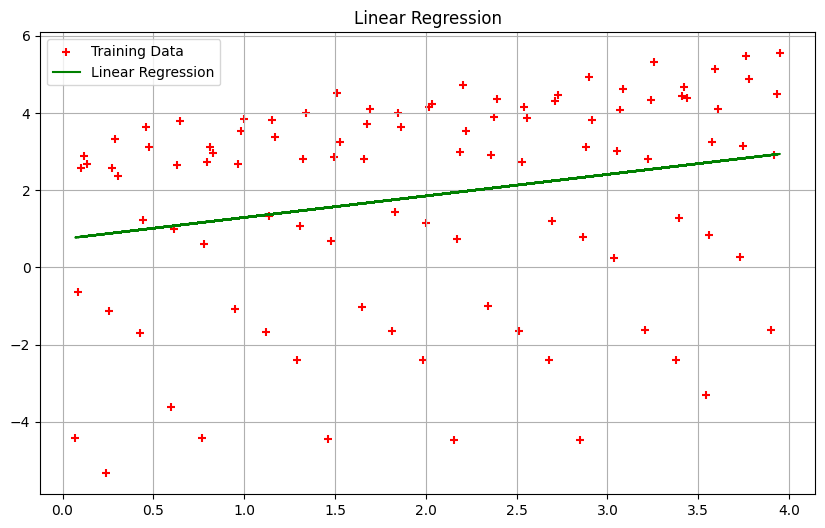

In [ ]:
mplot.scatter(X[:, 1], Y, color='red', marker='+', label='Training Data')
mplot.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')
mplot.grid(True)
mplot.title('Linear Regression')
mplot.legend()
mplot.show()

Calculate the data with x3 as the explanatory variable

Final Value of theta =  [ 2.86831421 -0.51925373]


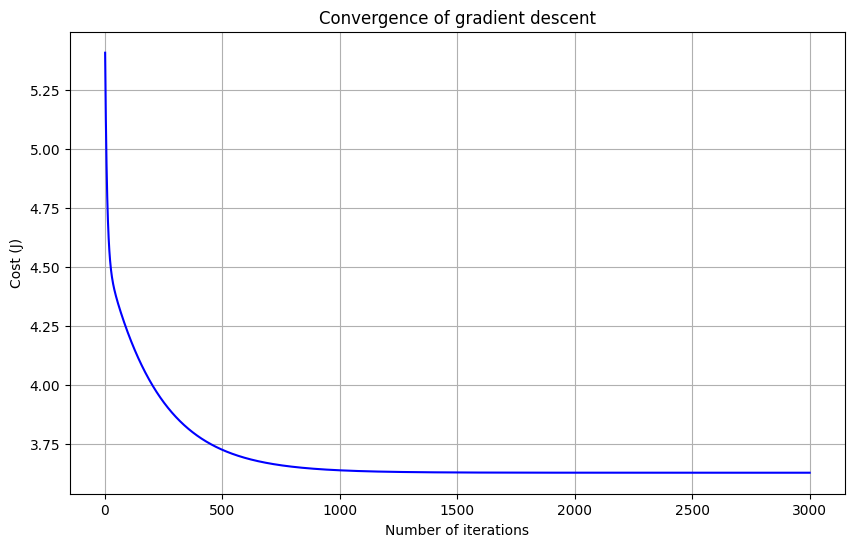

In [ ]:
X = X_3                                                       # Select the x3 variable array
theta = np.zeros(X.shape[1])                                  # Fill theta with 0 s
iterations = 3000                                             # Give a good amount of iterations just to be safe
alpha = .01                                                   # Set alpha
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final Value of theta = ', theta)                       # Print theta
theta_x3 = theta                                              # Save this theta for analysis
plot_loss(iterations, cost_history)                           # Plot loss function

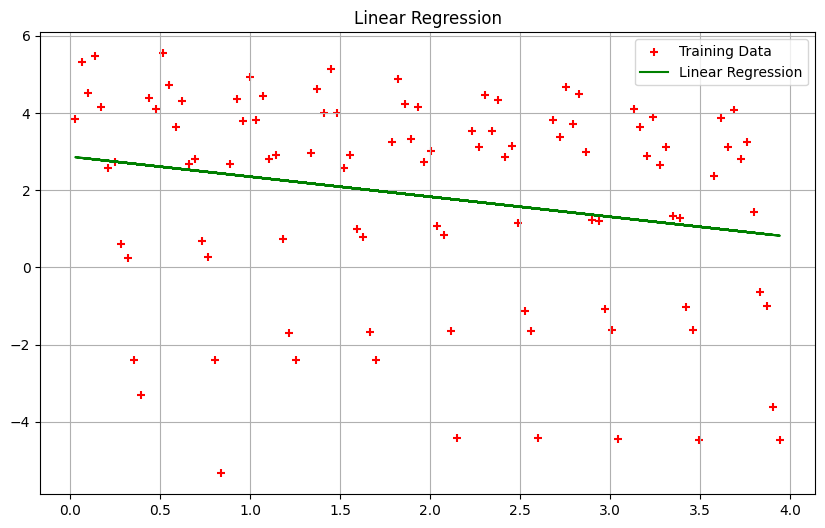

In [ ]:
mplot.scatter(X[:, 1], Y, color='red', marker='+', label='Training Data')
mplot.plot(X[:, 1], X.dot(theta), color='green', label='Linear Regression')
mplot.grid(True)
mplot.title('Linear Regression')
mplot.legend()
mplot.show()

Calculate Linear Regression for all values of x (x1, x2, x3) as the explanatory variables

Final Value of theta =  [ 5.05362928 -1.96691398  0.57561561 -0.22741231]


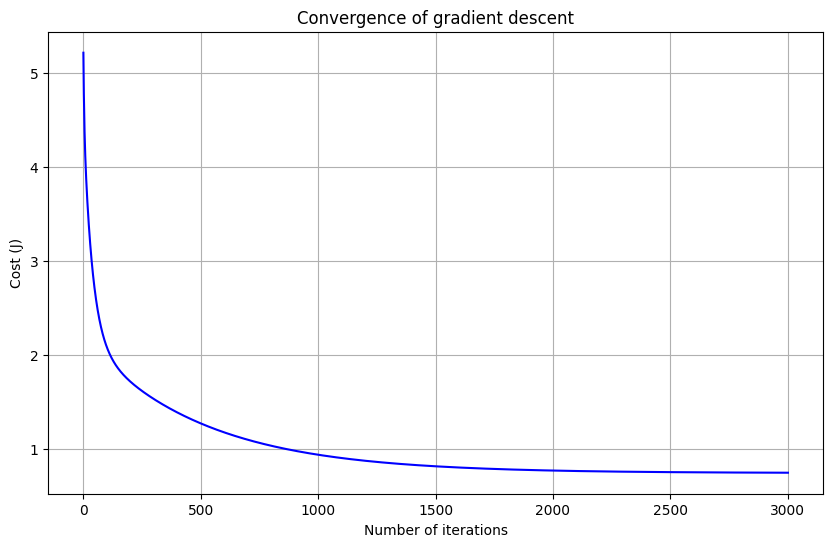

In [ ]:
X = X_all                                     # Select the merged data set
theta = np.zeros(X.shape[1])                  # Set theta equal to 0 at the start
iterations = 3000                             # Probably going excessive here
alpha = .01                                   # Small changes
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final Value of theta = ', theta)       # Display final theta values
plot_loss(iterations, cost_history)           # Plot the Loss function
final_theta = theta

In [ ]:
x0 = np.array([1,1,1])
X1 = np.array([1,1,1])
X2 = np.array([2,0,4])
X3 = np.array([3,2,1])
x0 = x0.reshape(3,1)
X1 = X1.reshape(3,1)
X2 = X2.reshape(3,1)
X3 = X3.reshape(3,1)
new_X = np.hstack((x0,X1,X2,X3))
new_prediction = new_X.dot(final_theta)
new_prediction

array([3.5557096 , 2.63189069, 5.16176543])